In [ ]:
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Resnet

# Fine-Tune ResNet50

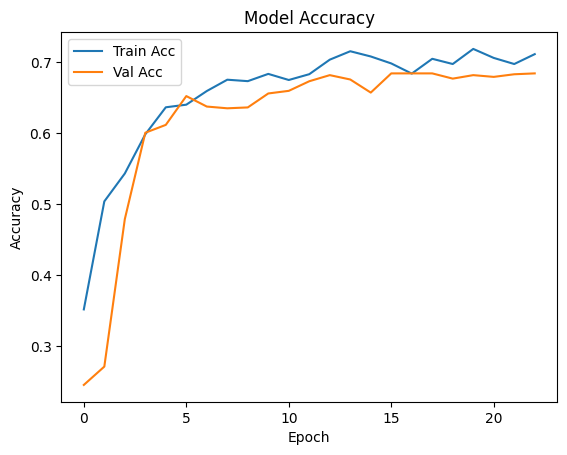

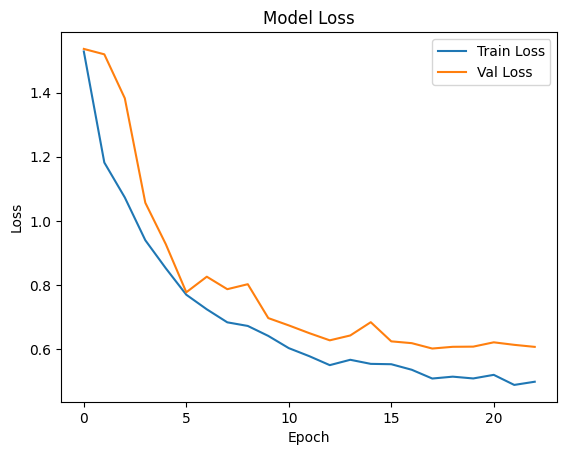

19/19 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step
              precision    recall  f1-score   support

         Bin       0.49      0.37      0.42       156
       Glass       0.94      0.90      0.92       204
       Metal       0.56      0.63      0.59       153
       Other       0.20      0.88      0.33         8
     Plastic       0.95      0.98      0.96        82

    accuracy                           0.70       603
   macro avg       0.63      0.75      0.64       603
weighted avg       0.72      0.70      0.71       603

mAP Score: 0.68


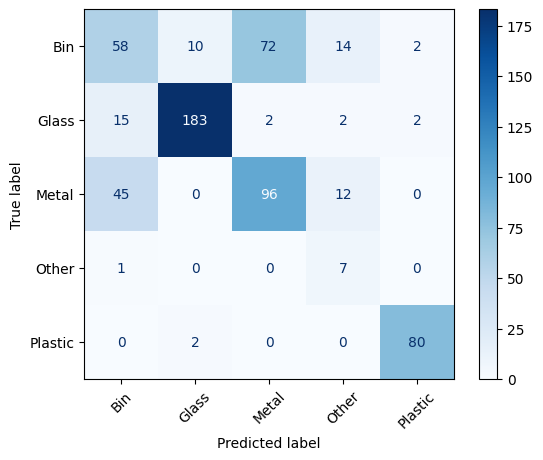

In [ ]:
#plot accuracy
plt.plot(history_finetune.history['accuracy'], label='Train Acc')
plt.plot(history_finetune.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#plot loss
plt.plot(history_finetune.history['loss'], label='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

pred_probs = model_resnet.predict(test_gen)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_gen.classes

print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))

# mAP calculate
map_score = average_precision_score(tf.keras.utils.to_categorical(y_true), pred_probs, average='macro')
print(f"mAP Score: {map_score:.2f}")

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()